<a href="https://colab.research.google.com/github/abhranil-datascience/DeepLearning/blob/ImageAnalytics/Day8_VGG16FromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
############################################ Mount Drive and make necessary imports ######################################################
from google.colab import drive
drive.mount('/content/gdrive')

############################## Change Directory ###################################
import os
os.chdir('/content/gdrive/My Drive/ImageAnalytics/Day1-CNN/Dataset')

########## Suppress Warnings ############
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#################### Define Constant Folder Names and Get File Paths ###########################
Dataset='/content/gdrive/My Drive/ImageAnalytics/Day1-CNN/Dataset'
TrainingSet='/training_set'
TestSet='/test_set'
TrainingSetPath=Dataset+TrainingSet
TestSetPath=Dataset+TestSet
cat_folder='/cats'
dog_folder='/dogs'
TrainingSetCat=TrainingSetPath+cat_folder
TrainingSetDog=TrainingSetPath+dog_folder
TestSetCat=TestSetPath+cat_folder
TestSetDog=TestSetPath+dog_folder
TrainingSetCatImages=[TrainingSetCat+"/"+path for path in os.listdir(TrainingSetCat) if '.jpg' in path]
TrainingSetDogImages=[TrainingSetDog+"/"+path for path in os.listdir(TrainingSetDog) if '.jpg' in path]
print("Number of Cats in Training Set: "+str(len(TrainingSetCatImages))+" || Number of Dogs in Training Set: "+str(len(TrainingSetDogImages)))
import random
random.shuffle(TrainingSetCatImages)
random.shuffle(TrainingSetDogImages)

Number of Cats in Training Set: 3928 || Number of Dogs in Training Set: 4000


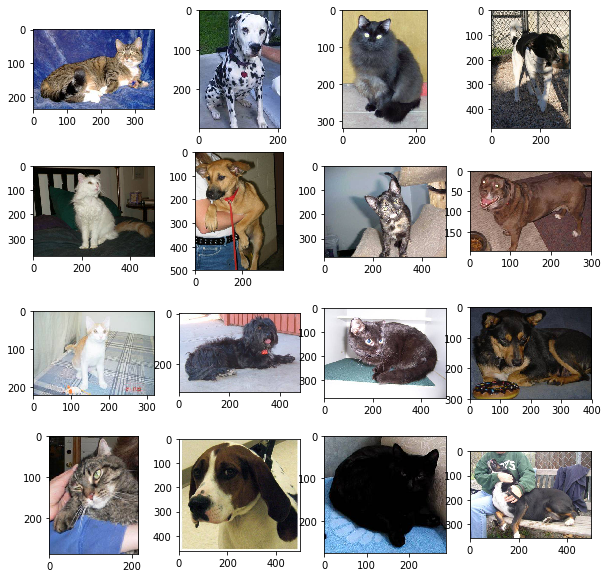

In [0]:
##################################### View Some Cat and Dog Images #####################################
TrainingSetImages=[]
for count in range(0,8):
  TrainingSetImages.append(TrainingSetCatImages[count])
  TrainingSetImages.append(TrainingSetDogImages[count])
import matplotlib.pyplot as plt
import matplotlib.image as mimg
fig=plt.figure(figsize=(10,10))
columns=4
rows=4
for count in range(0,len(TrainingSetImages)):
  curr_img=mimg.imread(TrainingSetImages[count])
  fig.add_subplot(rows,columns,count+1)
  imgplot=plt.imshow(curr_img)
plt.show()

In [0]:
######################################################## Create Image Generator and Preprocess #####################################################################
from keras.preprocessing.image import ImageDataGenerator
TrainImageGenerator=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
TestImageGenerator=ImageDataGenerator(rescale=1./255)
TrainDataset=TrainImageGenerator.flow_from_directory(directory=TrainingSetPath,target_size=(224,224),batch_size=90,classes=['cats','dogs'],
                                                     class_mode='categorical',shuffle=True)
TestDataset=TestImageGenerator.flow_from_directory(directory=TestSetPath,target_size=(224,224),batch_size=90,classes=['cats','dogs'],
                                                     class_mode='categorical',shuffle=True)
#TrainDataset.class_indices ==> {'cats': 0, 'dogs': 1}
#TestDataset.class_indices ==> {'cats': 0, 'dogs': 1}

Using TensorFlow backend.


Found 7928 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [0]:
################################################# Create VGG 16 Model ########################################################################
from keras.layers import Input,Dense,Conv2D,MaxPool2D,BatchNormalization,Activation,Flatten,Dropout
from keras.models import Model
from keras.optimizers import Adam
VGGInput=Input(shape=(224,224,3),name="Input")
####################################### Block 1 #####################################################
B1C1=Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),name="Block1_Conv1",padding='same',activation='relu')(VGGInput)
B1C2=Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),name="Block1_Conv2",padding='same',activation='relu')(B1C1)
B1M=MaxPool2D(pool_size=(3,3),strides=(2,2),padding='same',name="Block1_MaxPool")(B1C2)
#####################################################################################################

####################################### Block 2 #####################################################
B2C1=Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),name="Block2_Conv1",padding='same',activation='relu')(B1M)
B2C2=Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),name="Block2_Conv2",padding='same',activation='relu')(B2C1)
B2M=MaxPool2D(pool_size=(3,3),strides=(2,2),padding='same',name="Block2_MaxPool")(B2C2)
#####################################################################################################

####################################### Block 3 #####################################################
B3C1=Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),name="Block3_Conv1",padding='same',activation='relu')(B2M)
B3C2=Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),name="Block3_Conv2",padding='same',activation='relu')(B3C1)
B3C3=Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),name="Block3_Conv3",padding='same',activation='relu')(B3C2)
B3M=MaxPool2D(pool_size=(3,3),strides=(2,2),padding='same',name="Block3_MaxPool")(B3C3)
#####################################################################################################

####################################### Block 4 #####################################################
B4C1=Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),name="Block4_Conv1",padding='same',activation='relu')(B3M)
B4C2=Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),name="Block4_Conv2",padding='same',activation='relu')(B4C1)
B4C3=Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),name="Block4_Conv3",padding='same',activation='relu')(B4C2)
B4M=MaxPool2D(pool_size=(3,3),strides=(2,2),padding='same',name="Block4_MaxPool")(B4C3)
#####################################################################################################

####################################### Block 5 #####################################################
B5C1=Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),name="Block5_Conv1",padding='same',activation='relu')(B4M)
B5C2=Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),name="Block5_Conv2",padding='same',activation='relu')(B5C1)
B5C3=Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),name="Block5_Conv3",padding='same',activation='relu')(B5C2)
B5M=MaxPool2D(pool_size=(3,3),strides=(2,2),padding='same',name="Block5_MaxPool")(B5C3)
#####################################################################################################

Flat=Flatten()(B5M)
Dense1=Dense(units=4096,activation='relu')(Flat)
#DropoutLayer=Dropout(0.4)(Dense1)
Dense2=Dense(units=4096,activation='relu')(Dense1)
VGGOutput=Dense(units=2,activation='softmax')(Dense2)
VGGModel=Model(VGGInput,VGGOutput)

adam=Adam(lr=0.00001)
VGGModel.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
VGGModel.summary()







Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 224, 224, 3)       0         
_________________________________________________________________
Block1_Conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
Block1_Conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
Block1_MaxPool (MaxPooling2D (None, 112, 112, 64)      0         
_________________________________________________________________
Block2_Conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
Block2_Conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
Block2_MaxPool (MaxPooling2D (None, 56, 56, 128)     

In [6]:
############################################### Train Model and Save Best Model #######################################################
BestModelName='VGG16_BestModel.hdf5'
BestModelDirectoryPath="/content/gdrive/My Drive/ImageAnalytics/Day8-VGG16fromScratch/BestModel/"
BestModelPath=BestModelDirectoryPath+BestModelName
from keras.callbacks import ModelCheckpoint,EarlyStopping
save_best_model=ModelCheckpoint(filepath=BestModelPath,monitor='val_acc',save_best_only=True,mode='max',verbose=2)
early_stop=EarlyStopping(monitor='val_acc',min_delta=0.005,mode='max',restore_best_weights=True,patience=25,verbose=2)
vgg_model_training=VGGModel.fit_generator(generator=TrainDataset,steps_per_epoch=7928/90,epochs=100,callbacks=[save_best_model,early_stop],validation_data=TestDataset,
                                          validation_steps=2000/90,shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
89/88 [==============================] - 286s 3s/step - loss: 0.6905 - acc: 0.5219 - val_loss: 0.6808 - val_acc: 0.5125

Epoch 00001: val_acc improved from -inf to 0.51250, saving model to /content/gdrive/My Drive/ImageAnalytics/Day8-VGG16fromScratch/BestModel/VGG16_BestModel.hdf5
Epoch 2/100
89/88 [==============================] - 254s 3s/step - loss: 0.6600 - acc: 0.6003 - val_loss: 0.6528 - val_acc: 0.5975

Epoch 00002: val_acc improved from 0.51250 to 0.59750, saving model to /content/gdrive/My Drive/ImageAnalytics/Day8-VGG16fromScratch/BestModel/VGG16_BestModel.hdf5
Epoch 3/100
89/88 [==============================] - 254s 3s/step - loss: 0.6481 - acc: 0.6125 - val_loss: 0.6303 - val_acc: 0.6385

Epoch 00003: val_acc improved from 0.59750 to 0.63850, saving model to /content/gdrive/My Drive/ImageAnalytics/Day8-VGG16fromScratch/BestModel/VGG16_BestModel.hdf5
Epoch 4/100
89/88